Student: Tareq AbuNasser

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

# A. An overview of the dataset

## Import the data as a Pandas DataFrame and name it as df

In [2]:
df = pd.read_csv("p1_communes.csv")

## Check the number of rows and columns

In [3]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 2202
Number of columns: 17


## Display the first few entries of the DataFrame

In [4]:
display(df.head())
# normally also we view the last few entries by display(df.tail())

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


## Obtain the index labels, and then show the column names as a list

In [5]:
# I think it is best to change the index of the data frame to the communes name it will be more meaningful
index_labels = df.index
print("Index labels:", index_labels)

Index labels: RangeIndex(start=0, stop=2202, step=1)


In [6]:
column_names = df.columns.tolist()
print("Column names:", column_names)

Column names: ['Canton', 'Commune', 'Language', 'Residents', 'Population density per km²', '0-19 years', '20-64 years', '65 years or over', 'Private households', 'Surface area in km²', 'Settlement area', 'Agricultural area', 'Wooded area', 'Unproductive area', 'East coordinate', 'North coordinate', 'Elevation']


## Check the data type for each column.

In [7]:
data_types = df.dtypes
print("Data types of each column:")
display(data_types)

Data types of each column:


Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

## Check if there are any missing values and show the rows that contain the missing values

In [8]:
# Check for missing values
# calculate the count of missing values for each column
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Filter rows with missing values
rows_with_missing_values  = df[df.isnull().any(axis=1)]
print("\n\nRows conatins missing values:")
display(rows_with_missing_values[["Commune","Canton","Language"]])

Missing Values:
Canton                         3
Commune                        0
Language                      11
Residents                      0
Population density per km²     0
0-19 years                     0
20-64 years                    0
65 years or over               0
Private households             0
Surface area in km²            0
Settlement area                0
Agricultural area              0
Wooded area                    0
Unproductive area              0
East coordinate                0
North coordinate               0
Elevation                      0
dtype: int64


Rows conatins missing values:


,Commune,Canton,Language
155,Stammheim,ZH,NaN
156,Wädenswil,ZH,NaN
157,Elgg,ZH,NaN
158,Horgen,ZH,NaN
440,Thurnen,NaN,NaN
704,Villaz,NaN,NaN
757,Prez,NaN,NaN
1133,Bergün Filisur,GR,NaN
1165,Rheinwald,GR,NaN
1626,Riviera,TI,NaN


## If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type

In [9]:
# Check the proportion of missing values
df.isnull().mean() * 100

Canton                        0.136240
Commune                       0.000000
Language                      0.499546
Residents                     0.000000
Population density per km²    0.000000
0-19 years                    0.000000
20-64 years                   0.000000
65 years or over              0.000000
Private households            0.000000
Surface area in km²           0.000000
Settlement area               0.000000
Agricultural area             0.000000
Wooded area                   0.000000
Unproductive area             0.000000
East coordinate               0.000000
North coordinate              0.000000
Elevation                     0.000000
dtype: float64

In [10]:
# The Canton column has a missing value proportion of 0.136240%, and the Language column has a missing value proportion of 0.499546%.
# Both of these proportions are relatively low, indicating that only a small percentage of rows in these columns have missing values. 
# so i will removing observations with missing values and ensuring consistent data types
df.dropna(inplace=True)

In [11]:
missing_values = df.isnull().sum()
print("missing values after manipulate the data::")
print(missing_values)

missing values after manipulate the data::
Canton                        0
Commune                       0
Language                      0
Residents                     0
Population density per km²    0
0-19 years                    0
20-64 years                   0
65 years or over              0
Private households            0
Surface area in km²           0
Settlement area               0
Agricultural area             0
Wooded area                   0
Unproductive area             0
East coordinate               0
North coordinate              0
Elevation                     0
dtype: int64


# B. Exploration: numerical summaries, indexing and grouping

## Obtain the mean, minimum and maximum value for each column containing numerical data. Your output should preferably show only the three requested statistics and not the full table of descriptive statistics

In [12]:
# Calculate the mean, minimum, and maximum values
# describe function provide a lot of descriptive statistics, so I use loc[["mean","min","max"],:] to select just what you want
np.round(df.describe().loc[["mean","min","max"],:],3)

,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
mean,3865.3,433.424,20.585,60.371,19.044,1702.485,17.973,14.883,45.930,32.576,6.612,2631543.268,1202301.552,768.209
min,11.0,0.895,0.000,18.182,6.271,10.000,0.310,0.139,0.000,0.000,0.000,2486700.000,1077200.000,200.000
max,415367.0,12669.052,37.778,77.922,81.818,201252.000,438.630,97.260,91.509,88.235,95.023,2828800.000,1294100.000,3080.000


## List the 10 most populated communes, ordered by their number of residents

In [13]:
# There are a lot of ways to do this task but I think this way is the easiest one
most_populated_communes_df = df.nlargest(10, 'Residents')
print("10 most populated communes:")
display(most_populated_communes_df[['Commune', 'Residents']])

10 most populated communes:


,Commune,Residents
154,Zürich,415367
2124,Genève,201818
910,Basel,172258
1749,Lausanne,139111
194,Bern,133883
141,Winterthur,111851
535,Luzern,81691
1053,St. Gallen,75833
1582,Lugano,63185
207,Biel/Bienne,55159


## List the 10 least populated communes, ordered by their number of residents

In [14]:
least_populated_communes_df = df.nsmallest(10, 'Residents')
print("10 least populated communes:")
display(least_populated_communes_df[['Commune', 'Residents']])

10 least populated communes:


,Commune,Residents
1546,Corippo,11
875,Kammersrohr,28
2011,Bister,33
366,Schelten,36
370,Rebévelier,41
485,Berken,45
1629,Cerentino,45
342,Clavaleyres,46
1160,Lohn (GR),46
1627,Bosco/Gurin,46


## Group the communes by canton and save them into separate .csv files

In [15]:
# group the communes by canton
grouped_cantons =df.groupby("Canton")
# iterate over the canton group
for canton, data in grouped_cantons:
    # save each canton with its data in separate CSV file
    data.to_csv(f'{canton}.csv', index=False)

## Compute the mean population density for each canton and rank the cantons from most dense to least dense

In [16]:
# get the grouped_cantons
# Calculate the mean population density for each group canton, this will resulting a series
mean_density_per_canton = grouped_cantons['Population density per km²'].mean()
# sort the series in descending order
sort_density_per_canton = mean_density_per_canton.sort_values(ascending=False).to_frame()
# rank_density_per_canton = sort_density_per_canton.rank(ascending=False)
print("Mean population density per canton (from most dense to least dense):")
display(sort_density_per_canton)

Mean population density per canton (from most dense to least dense):


,Population density per km²
Canton,
BS,3236.627458
GE,1802.562712
ZH,814.007380
ZG,709.802261
TI,644.134835
BL,565.737021
SG,535.510464
AG,509.434515
VD,435.300495


## Compute the number of communes in each canton where more than 50 percent of their populations are aged between 20 and 64 years old

In [17]:
# filter the DataFrame to include only the rows where the proportion of population aged between 20 and 64 years old is greater than 50
filtered_communes_df = df[df['20-64 years'] > 50]

# Group the filtered DataFrame by the "Canton" column get it it's communes count
communes_count_per_canton = filtered_communes_df.groupby('Canton').size()
print("Number of communes in each canton with majority population aged 20-64 years:")
print(communes_count_per_canton.sort_values(ascending=False)) 

# it's more appropriate to wiew the data sorted in descending order

Number of communes in each canton with majority population aged 20-64 years:
Canton
BE    339
VD    309
AG    210
ZH    158
FR    131
VS    124
TI    113
SO    109
GR    100
BL     86
LU     82
TG     80
SG     77
JU     53
GE     45
NE     30
SZ     29
SH     26
UR     20
AR     20
ZG     11
NW     11
OW      7
AI      6
BS      3
GL      3
dtype: int64


## Compute the difference between the maximum and minimum elevations for each canton. Find the top 5 cantons that have the largest range of elevations?

In [18]:
# get the grouped_cantons
# Calculate the difference between the maximum and minimum elevations for each group
elevation_range_per_canton = grouped_cantons['Elevation'].agg(lambda x: x.max() - x.min())
elevation_range_per_canton
# we can use apply function in replace of agg
# but I have used agg because it's more efficient as it performs the aggregation operation more directly
# and apply is more flexible and can be used for more complex operations that require applying a custom function to each group

Canton
AG     408
AI     432
AR     488
BE    2025
BL     599
BS     184
FR     988
GE     116
GL     587
GR    2017
JU     606
LU     944
NE     708
NW    1010
OW     501
SG    1429
SH     314
SO     675
SZ    1271
TG     318
TI    2044
UR    1871
VD    1292
VS    2610
ZG     560
ZH     521
Name: Elevation, dtype: int64

In [19]:
# Find the top 5 cantons with the largest range of elevations
top_5_cantons_elevation_range = elevation_range_per_canton.nlargest(5)
print("Top 5 cantons with the largest range of elevations:")
print(top_5_cantons_elevation_range)


Top 5 cantons with the largest range of elevations:
Canton
VS    2610
TI    2044
BE    2025
GR    2017
UR    1871
Name: Elevation, dtype: int64


# C. Exploration: visualizations

## Your task is to obtain a horizontal bar plot that shows the top 10 populated communes

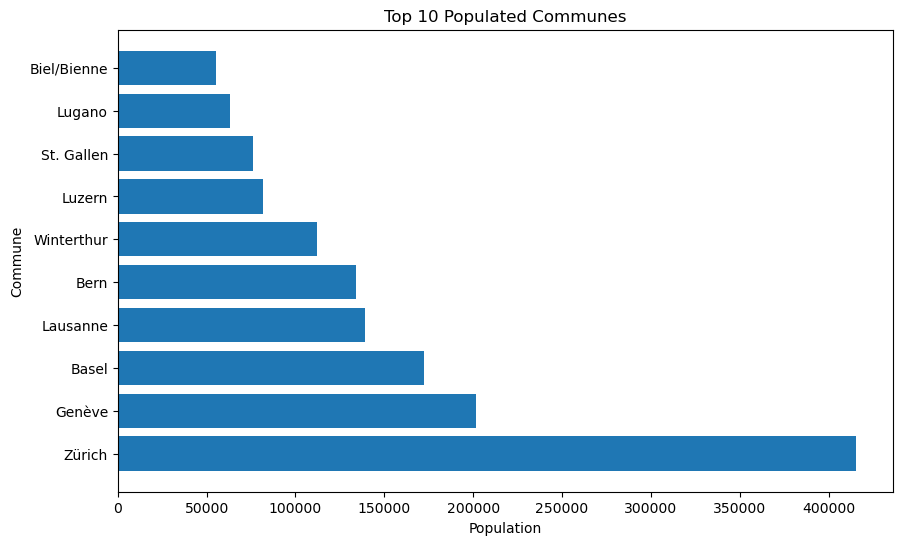

In [20]:
# Select the top 10 populated communes
top_10_populated_communes = df.nlargest(10, 'Residents')

 # Set the figure size
plt.figure(figsize=(10, 6)) 

# Create the bar plot
plt.barh(top_10_populated_communes['Commune'], top_10_populated_communes['Residents'])

# Set the title and labels
plt.title('Top 10 Populated Communes')
plt.xlabel('Population')
plt.ylabel('Commune')

# Invert the y-axis to display the communes in descending order
# plt.gca().invert_yaxis()

# Show the plot
plt.show()

## For the top 10 populated communes of the previous step, your task now is to plot a horizontal stacked bar chart that shows how their lands are divided into the 4 area types :  Settlement, Agricultural, Wooded, Unproductive

<Figure size 1000x600 with 0 Axes>

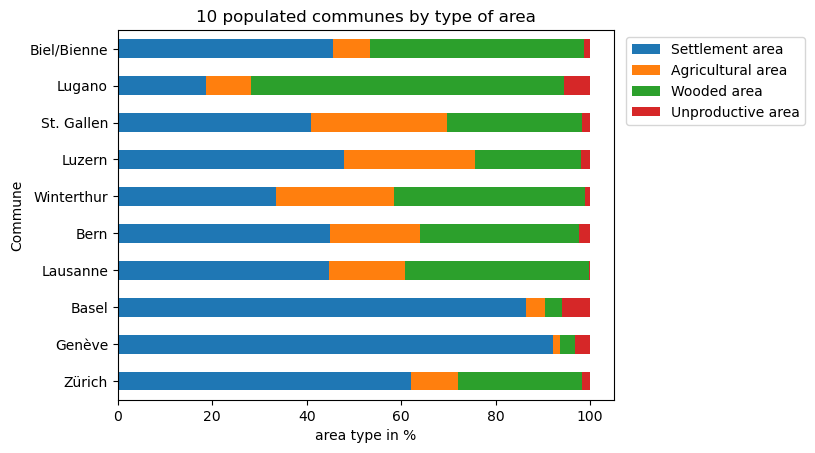

In [21]:
# Select the top 10 populated communes
top_10_populated_communes = df.nlargest(10, 'Residents')


# Create a new DataFrame containing the commune column and the four area types
land_division = top_10_populated_communes[['Commune', 'Settlement area', 'Agricultural area', 'Wooded area', 'Unproductive area']].copy()

# Set the 'Commune' column as the index
land_division.set_index('Commune', inplace=True)

# Set the figure size
plt.figure(figsize=(10, 6))  

# Create the stacked bar chart
land_division.plot.barh(stacked=True)

# Set the title and labels
plt.title('10 populated communes by type of area')
plt.xlabel('area type in %')
plt.ylabel('Commune')

# Set the legend
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1))


# Show the plot
plt.show()


## We are interested in the number of communes and their proportions of young residents (0-19yrs). Your task is to obtain a histogram that shows the number of communes for which this proportion falls into the following intervals

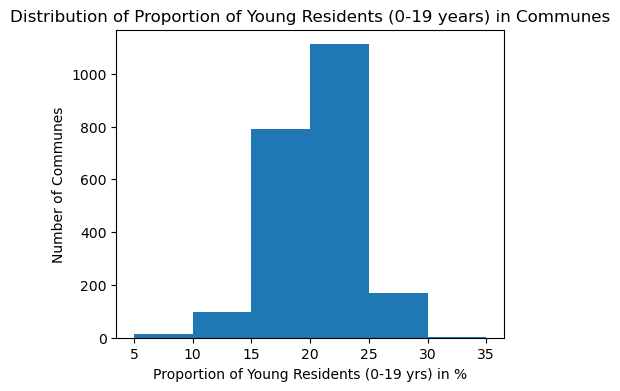

In [22]:
# Define the boundaries of the intervals
interval_boundaries = [5, 10, 15, 20, 25, 30, 35]

proportions_0_19 = df['0-19 years']

plt.figure(figsize=(5,4))

#Create the histogram
plt.hist(proportions_0_19, bins=interval_boundaries)

# Add labels and title
plt.xlabel('Proportion of Young Residents (0-19 yrs) in %')
plt.ylabel('Number of Communes')
plt.title('Distribution of Proportion of Young Residents (0-19 years) in Communes')

plt.show()

# The figure shows that in most of the communes, the proportion of people 0-19 years old has a range of 15%-25% of residents
# Also the figure shows that the data approximately follow the normal distribution

## Your task is to investigate the distributions of the age group 0-19 years, which is a numerical variable, across four language regions

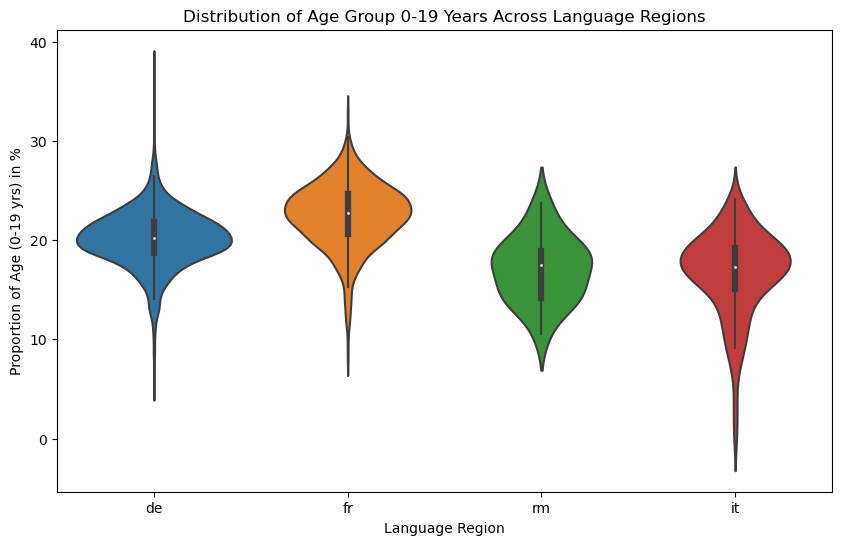

In [23]:
plt.figure(figsize=(10, 6))

# Create the violin plot
sns.violinplot(x="Language", y="0-19 years", data=df)
# Set the title and labels
plt.title("Distribution of Age Group 0-19 Years Across Language Regions")
plt.xlabel("Language Region")
plt.ylabel("Proportion of Age (0-19 yrs) in %")

# Display the plot
plt.show()

# I have used a violin plot because aside from showing  statistics that appeared in boxplot it also shows the entire distribution of the data and the density of each variable

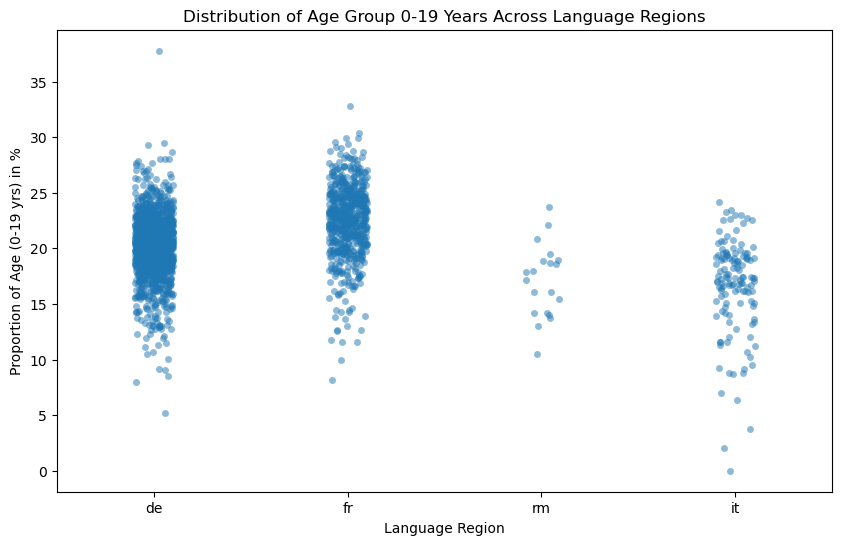

In [24]:
plt.figure(figsize=(10, 6))

# Create the violin plot
# sns.violinplot(x="Language", y="0-19 years", data=df)
sns.stripplot(x='Language',  y="0-19 years", data=df, alpha=0.5)

# Set the title and labels
plt.title("Distribution of Age Group 0-19 Years Across Language Regions")
plt.xlabel("Language Region")
plt.ylabel("Proportion of Age (0-19 yrs) in %")

# Display the plot
plt.show()

# I have used a violin plot because aside from showing  statistics that appeared in boxplot it also shows the entire distribution of the data and the density of each variable

## Your task is to do the previous task for the three age groups 0-19 years, 20-64 years, and 65 years or over

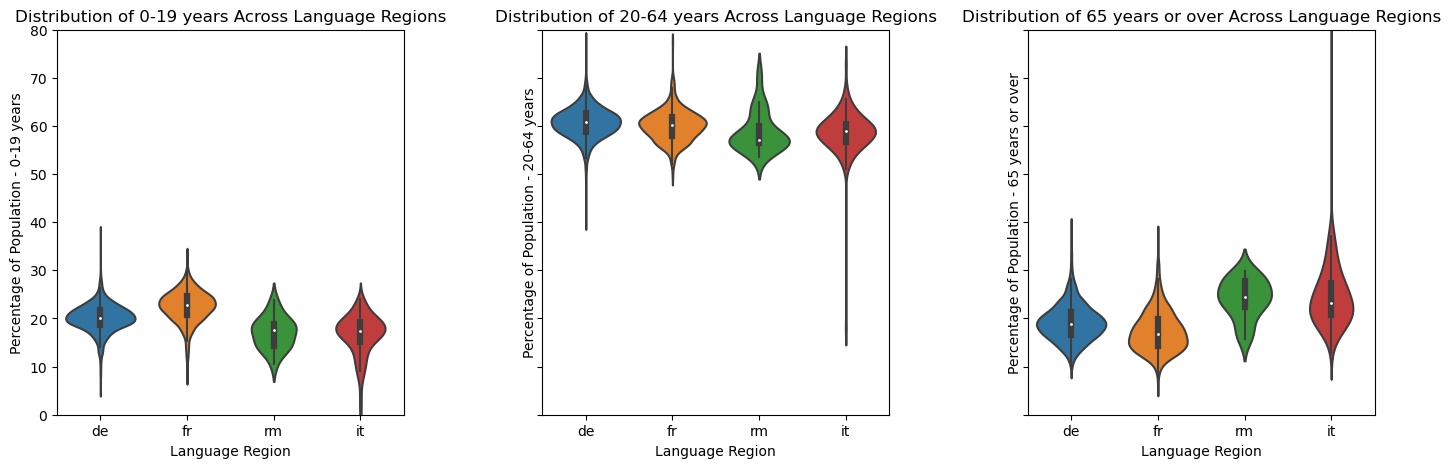

In [25]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharey=True)

# Define the age group labels
age_groups = ['0-19 years', '20-64 years', '65 years or over']

# Loop through the age groups
for i, age_group in enumerate(age_groups):
    # Create the subplot with violin plot
    sns.violinplot(x='Language', y=age_group, data=df, ax=axes[i])

    # Add observations as a strip plot on the same subplot
    # sns.stripplot(x='Language', y=age_group, data=df, ax=axes[i], color='black', alpha=0.5)

    # Set the x-axis label and title for the subplot
    axes[i].set_xlabel('Language Region')
    axes[i].set_ylabel(f'Percentage of Population - {age_group}')
    axes[i].set_title(f'Distribution of {age_group} Across Language Regions')

    # Set the y-axis limits
    axes[i].set_ylim(0, 80)

# # Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)
# Display the plot
plt.show()

## Your task is to use the pairplot from Seaborn and produce 3 plots to visually investigate the relation between the Agricultural area of communes and their Settlement area, Wooded area and the Unproductive area

<Figure size 1200x800 with 0 Axes>

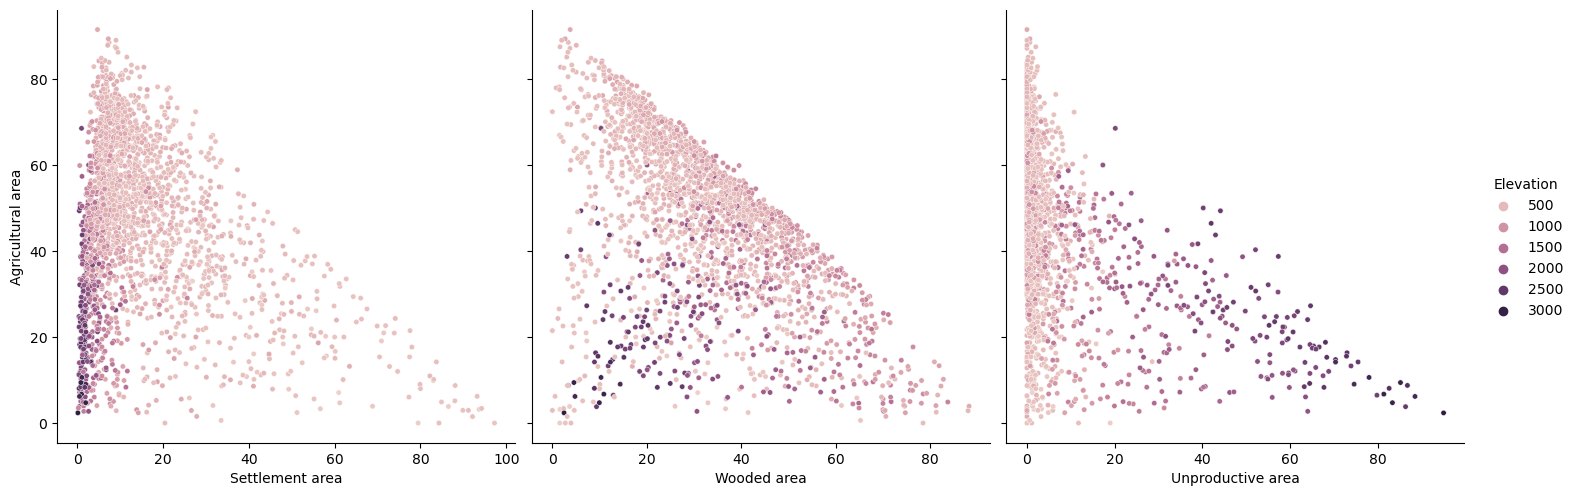

In [26]:
x_columns = ['Settlement area', 'Wooded area', 'Unproductive area']
plt.figure(figsize=(12,8))
# Use pairplot to visualize the relationships with Elevation as the color-code variable
sns.pairplot(df,y_vars=['Agricultural area'],x_vars=x_columns, hue='Elevation',height=5,plot_kws={'s': 15})

# Display the plot
plt.show()

### Are the relations linear?

In [27]:
df.corr().loc["Agricultural area",x_columns]
# By observing the figures and the correlations between the Agricultural area of communes and their Settlement area, Wooded area and the Unproductive area .
# it seems that all relations are weak negative linear relationship

Settlement area     -0.296166
Wooded area         -0.527638
Unproductive area   -0.458628
Name: Agricultural area, dtype: float64

In [28]:
# We can observe from Figure one that  communes that are located in high altitudes have very low Settlement and Agricultural area
# Also we can observe from figure three communes that are located in high altitudes have a lot of Unproductive areas

## Your task is to draw a map of Switzerland using the East and North coordinates of communes. Ensure that the plot has an appropriate title, legend and labels

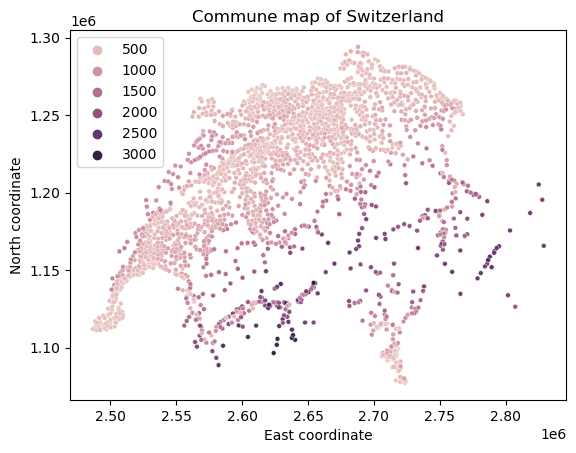

In [29]:
# Create a scatter plot of the East and North coordinates
sns.scatterplot(data=df,x="East coordinate",y="North coordinate",hue="Elevation",s=12)

# Set the title and labels
plt.title('Commune map of Switzerland')
plt.xlabel('East coordinate')
plt.ylabel('North coordinate')
# Display the legend
plt.legend(loc='upper left')

# Display the plot
plt.show()

# hte figure shows that most of Communes have elevation lower than 1500.

### Re-do the same plot but this time with the Language as the color-code variable

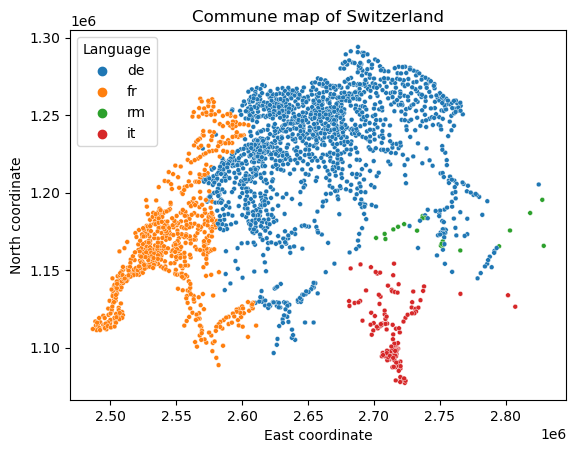

In [30]:
# Create a scatter plot of the East and North coordinates
sns.scatterplot(data=df, x='East coordinate', y='North coordinate', hue='Language',s=12)

# Set the title and labels
plt.title('Commune map of Switzerland')
plt.xlabel('East coordinate')
plt.ylabel('North coordinate')

# Display the legend
plt.legend(title='Language', loc='upper left')

# Display the plot
plt.show()

# The figure shows that the German "de" language is the most popular language in Switzerland

## Your task is to obtain the two plots from the previous task as subplots (with 1 row and 2 columns)

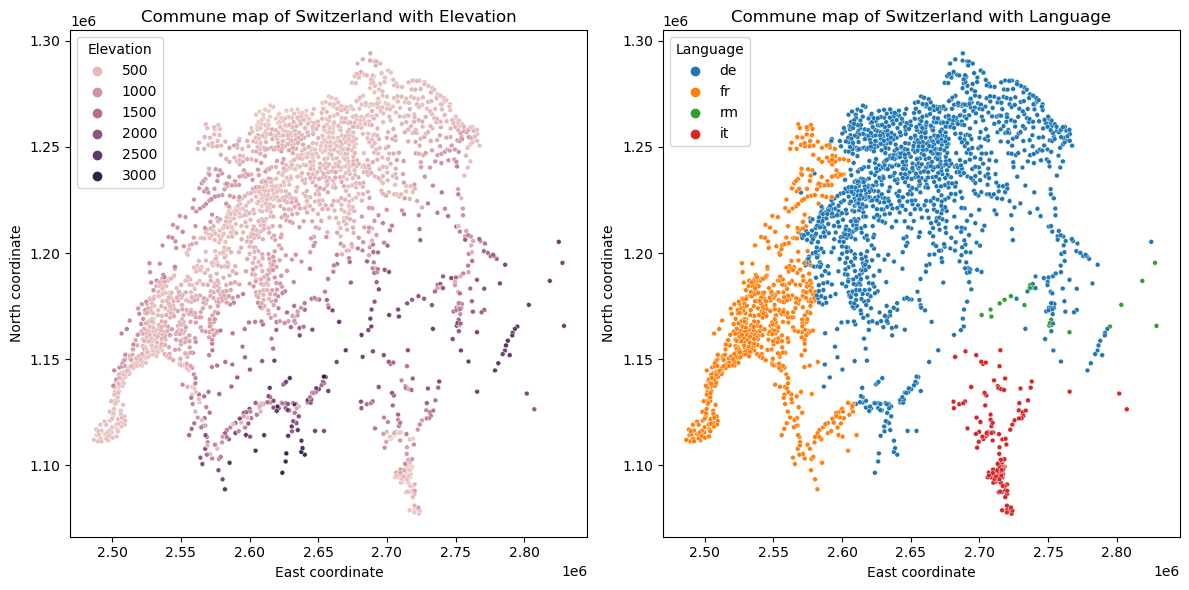

In [31]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Elevation as the color-code variable
sns.scatterplot(data=df, x='East coordinate', y='North coordinate', hue='Elevation', ax=axes[0],s=12)
axes[0].set_title('Commune map of Switzerland with Elevation')
axes[0].set_xlabel('East coordinate')
axes[0].set_ylabel('North coordinate')
axes[0].legend(title='Elevation',loc='upper left')

# Plot 2: Language as the color-code variable
sns.scatterplot(data=df, x='East coordinate', y='North coordinate', hue='Language', ax=axes[1],s=12)
axes[1].set_title('Commune map of Switzerland with Language')
axes[1].set_xlabel('East coordinate')
axes[1].set_ylabel('North coordinate')
axes[1].legend(title='Language',loc='upper left')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


# D. Probabilities

In [32]:
# this the equation of conditional probability
# P(commune_from_VS | Elevation > 2000) = P(commune_from_VS ∩ (Elevation > 2000)) / P(Elevation > 2000)

# Filter the DataFrame to include only communes with elevation over 2000
elevation_over_2000_df = df[df['Elevation'] > 2000]

# Filter communes with elevation over 2000 in the canton of Valais
valais_communes_elevation_over_2000 = elevation_over_2000_df[elevation_over_2000_df['Canton'] == 'VS']

# Calculate the number of communes from Valais with elevation over 2000
valais_count_elevation_over_2000 = len(valais_communes_elevation_over_2000)
# Calculate the total number of communes with elevation over 2000
total_count_elevation_over_2000 = len(elevation_over_2000_df)

# Compute the probability
probability_valais = valais_count_elevation_over_2000 / total_count_elevation_over_2000

# Print the result
print("The probability that a randomly selected commune with elevation over 2000 is from the canton of Valais is:", probability_valais)

The probability that a randomly selected commune with elevation over 2000 is from the canton of Valais is: 0.5104166666666666


# E. Matrices

In [33]:
# creates a matrix DataFrame with zero values using unique communes and cantons as the row and column indices. 
# Then, it iterates over each row in the original DataFrame and sets the corresponding entry in the matrix to 1 if the commune is in the canton.

# Get unique communes and cantons
unique_communes = df['Commune']
unique_cantons = df['Canton'].unique()

# Create an matrix DataFrame with zero values
matrix = pd.DataFrame(0, index=unique_communes, columns=unique_cantons)

# Fill in the matrix with 1 if commune is in canton
for i, row in df.iterrows():
    matrix.loc[row['Commune'], row['Canton']] = 1

# display the matrix
display(matrix)

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
Commune,,,,,,,,,,,,,,,,,,,,,
Aeugst am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Affoltern am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bonstetten,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hausen am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hedingen,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vendlincourt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Basse-Allaine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Clos du Doubs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
